In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df=pd.read_csv(r"C:\Users\21650\Downloads\International_Education_Costs.csv")

In [135]:
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [136]:
df["Insurance_USD"].max()

np.int64(1500)

In [137]:
print(df.shape)
df.info()


(907, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [138]:
int(df[df["Tuition_USD"]==0].count()[0])

C:\Users\21650\AppData\Local\Temp\ipykernel_28108\3647614196.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  int(df[df["Tuition_USD"]==0].count()[0])


103

In [139]:
df_cleaned=df[df["Tuition_USD"]!=0]

In [150]:
df_grouped=df_cleaned.groupby(by=["Country"])["Tuition_USD"].mean()

C:\Users\21650\AppData\Local\Temp\ipykernel_28108\1476067822.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_cheapest.sort_values(by="Tuition_USD",ascending=False),x="Country",y="Tuition_USD",palette='viridis')


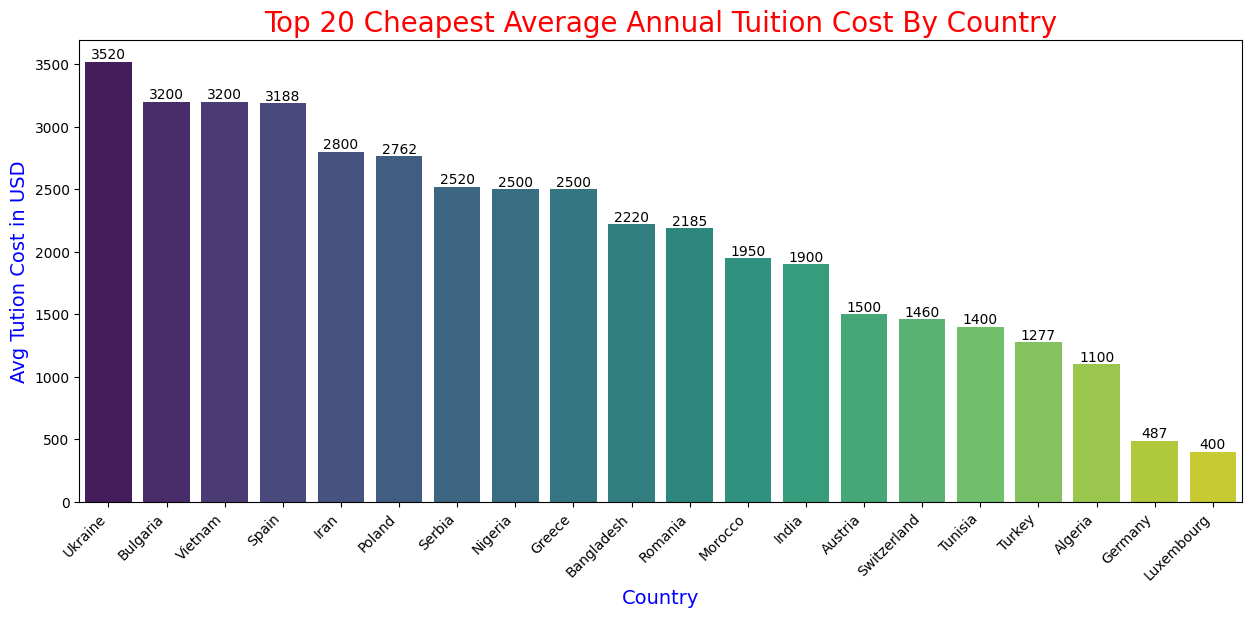

In [151]:
df_cheapest=df_grouped.sort_values(ascending=True).head(20).reset_index()
plt.figure(figsize=(15,6))
ax=sns.barplot(data=df_cheapest.sort_values(by="Tuition_USD",ascending=False),x="Country",y="Tuition_USD",palette='viridis')
for container in ax.containers:
    plt.bar_label(container,fmt='%d',label_type="edge")
plt.xticks(rotation=45,ha='right')
plt.title("Top 20 Cheapest Average Annual Tuition Cost By Country",color='red',fontsize=20)
plt.xlabel("Country",color='blue',fontsize=14)
plt.ylabel("Avg Tution Cost in USD",color='blue',fontsize=14)

plt.show()

C:\Users\21650\AppData\Local\Temp\ipykernel_28108\2486286565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_cheapest.sort_values(by="Tuition_USD",ascending=True),x="Country",y="Tuition_USD",palette='viridis')


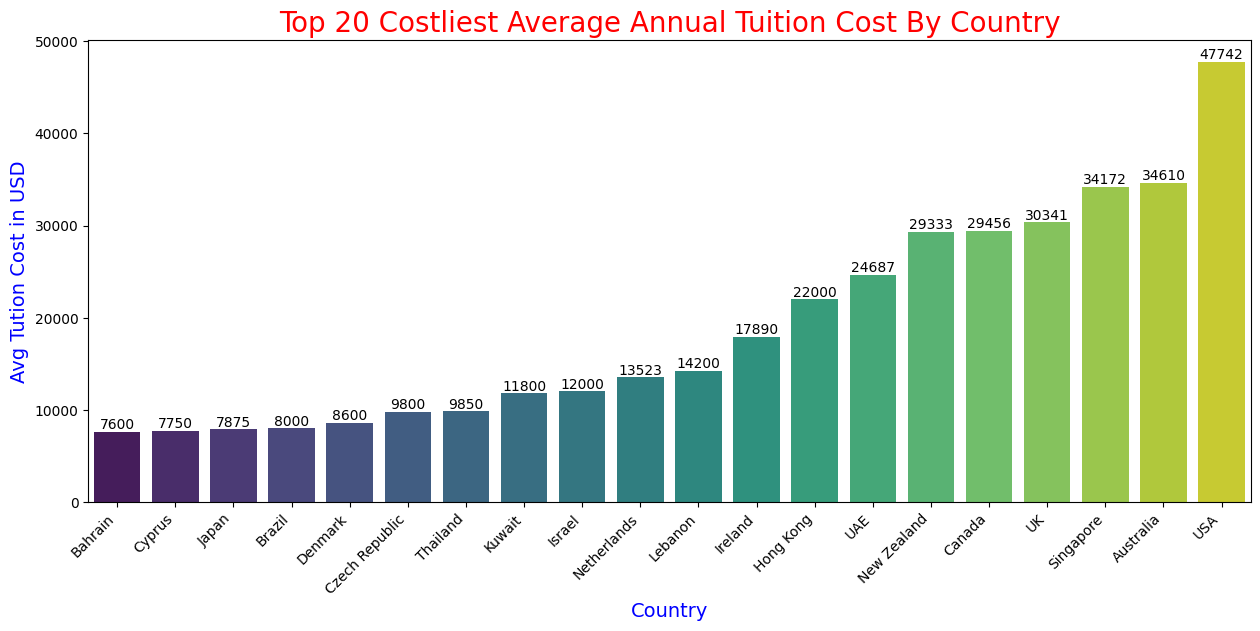

In [152]:
df_cheapest=df_grouped.sort_values(ascending=False).head(20).reset_index()
plt.figure(figsize=(15,6))
ax=sns.barplot(data=df_cheapest.sort_values(by="Tuition_USD",ascending=True),x="Country",y="Tuition_USD",palette='viridis')
for container in ax.containers:
    plt.bar_label(container,fmt='%d',label_type="edge")
plt.xticks(rotation=45,ha='right')
plt.title("Top 20 Costliest Average Annual Tuition Cost By Country",color='red',fontsize=20)
plt.xlabel("Country",color='blue',fontsize=14)
plt.ylabel("Avg Tution Cost in USD",color='blue',fontsize=14)

plt.show()

<Axes: >

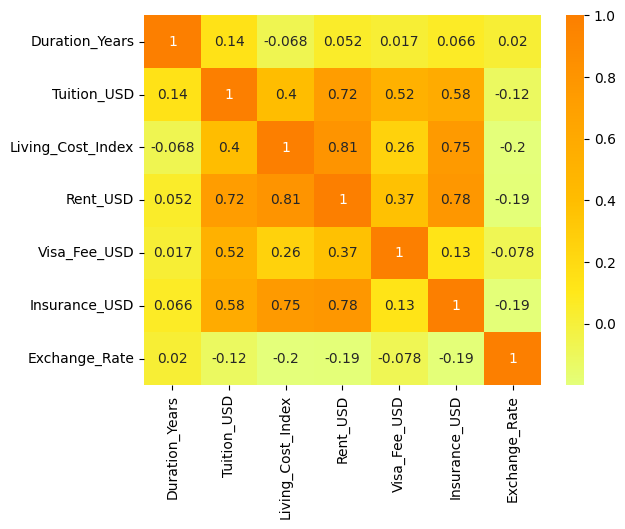

In [143]:
sns.heatmap(data=df.select_dtypes(include=["number"]).corr(),cmap="Wistia",annot=True)

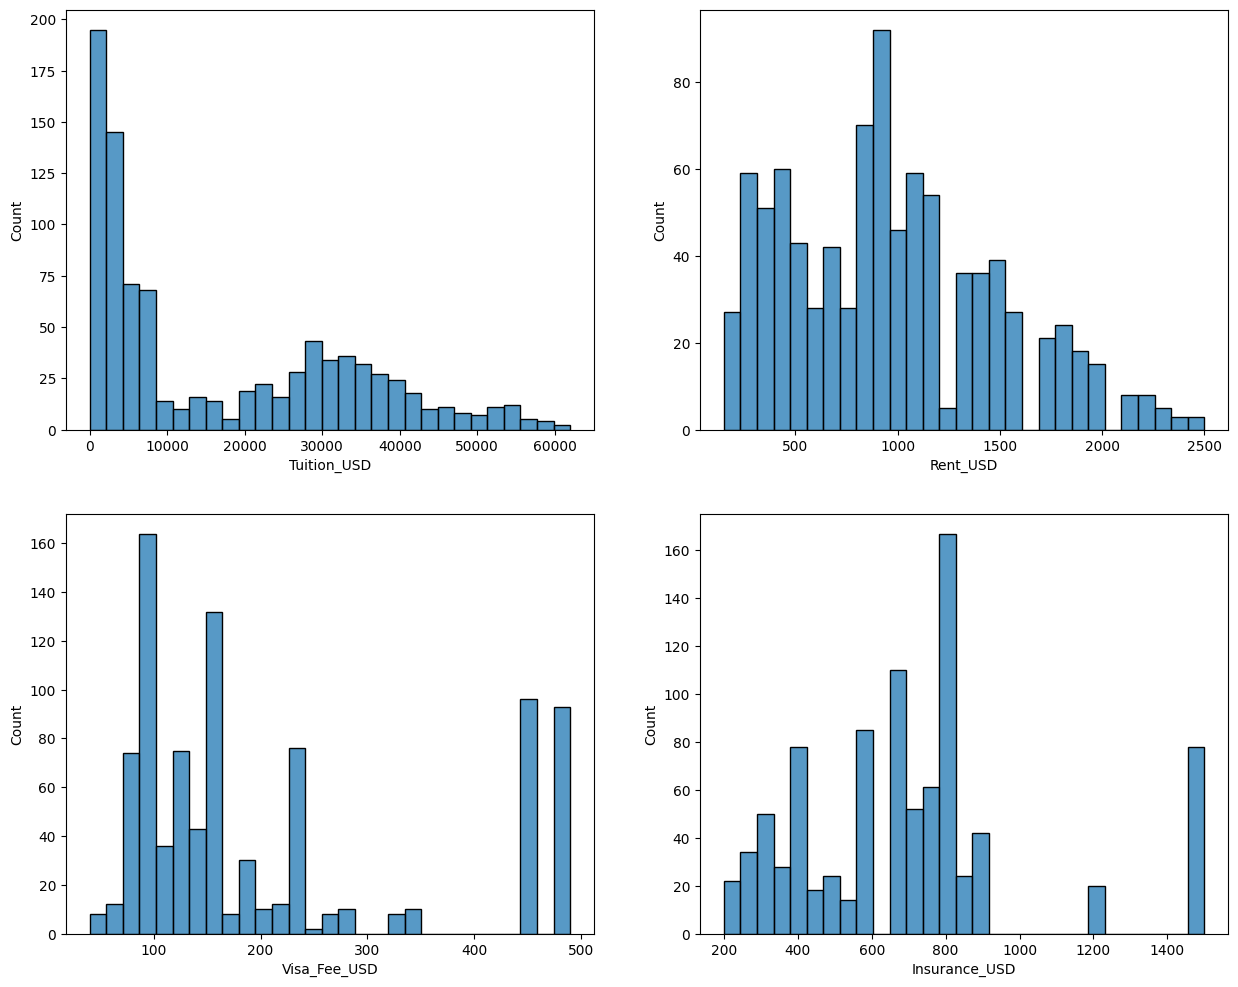

In [144]:
fig,axs=plt.subplots(2,2,figsize=(15,12))
sns.histplot(data=df,x="Tuition_USD",bins=29,ax=axs[0,0])
sns.histplot(data=df,x="Rent_USD",bins=29,ax=axs[0,1])
sns.histplot(data=df,x="Visa_Fee_USD",bins=29,ax=axs[1,0])
sns.histplot(data=df,x="Insurance_USD",bins=29,ax=axs[1,1])
plt.show()

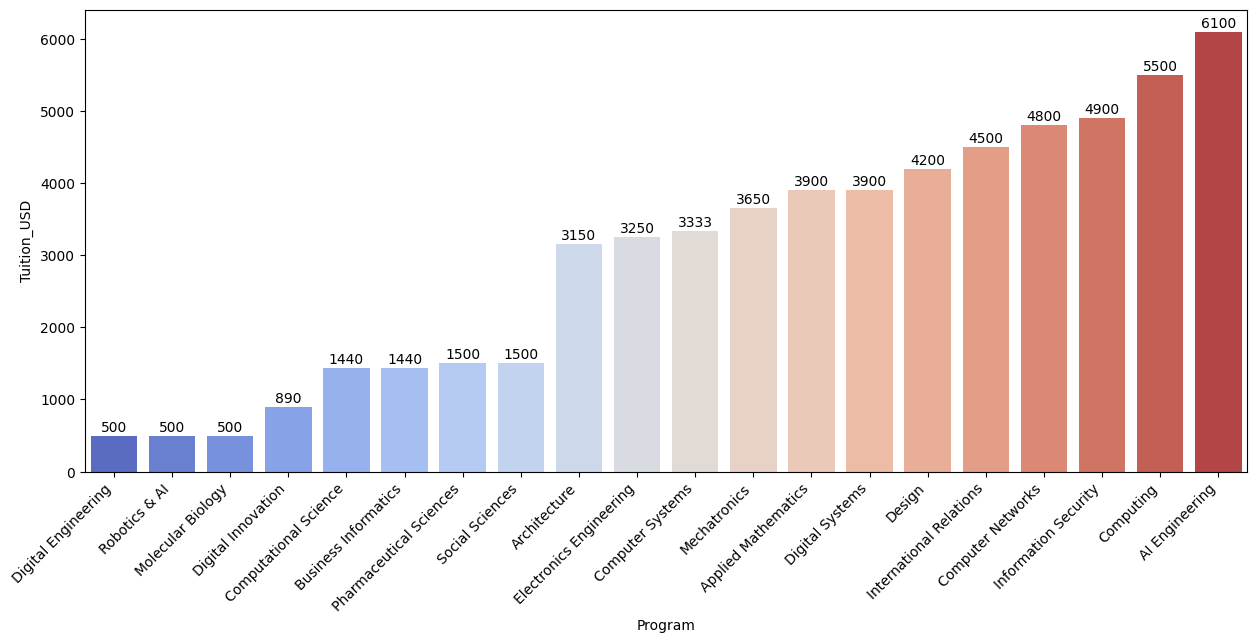

In [149]:
plt.figure(figsize=(15,6))
ax=sns.barplot(df_cleaned.groupby("Program")["Tuition_USD"].mean().sort_values().head(20).reset_index(),x="Program",hue="Program",y="Tuition_USD",palette='coolwarm')
for container in ax.containers:
    plt.bar_label(container,fmt='%d',label_type="edge",padding=1)
plt.xticks(rotation=45,ha='right')
plt.show()

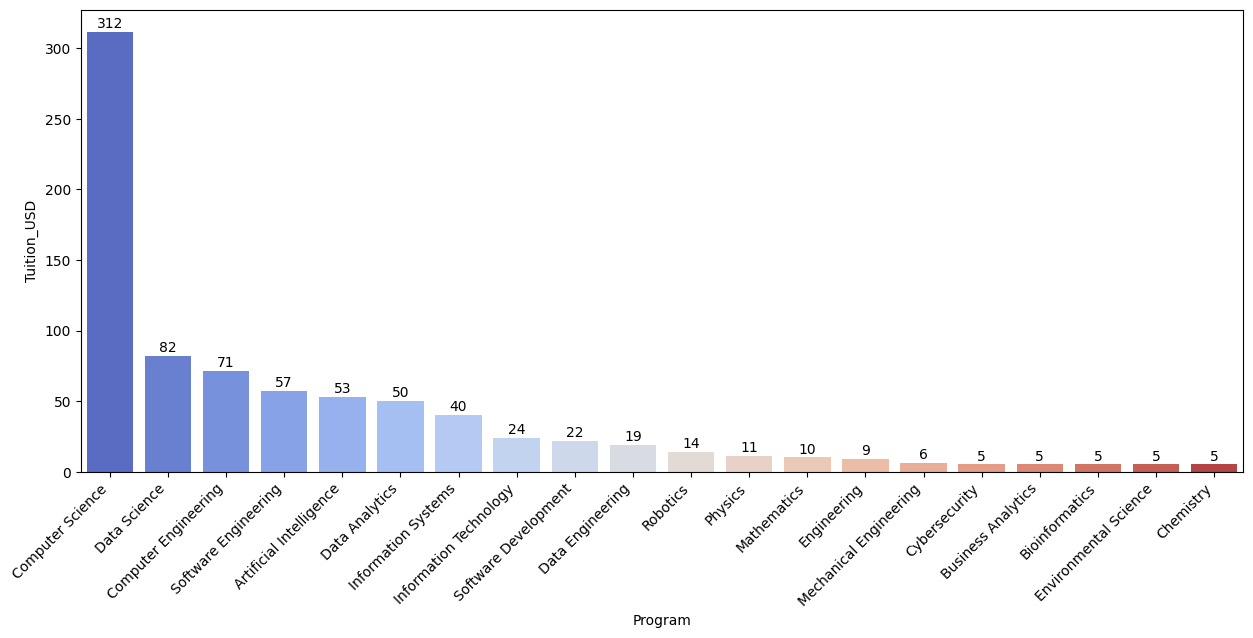

In [146]:
plt.figure(figsize=(15,6))
ax=sns.barplot(df.groupby("Program")["Tuition_USD"].count().sort_values(ascending=False).head(20).reset_index(),x="Program",hue="Program",y="Tuition_USD",palette='coolwarm')
for container in ax.containers:
    plt.bar_label(container,fmt='%d',label_type="edge",padding=1)
plt.xticks(rotation=45,ha='right')
plt.show()